<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Task-1.-Data-exploration" data-toc-modified-id="Task-1.-Data-exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Task 1. Data exploration</a></span></li><li><span><a href="#Data-transformation" data-toc-modified-id="Data-transformation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data transformation</a></span><ul class="toc-item"><li><span><a href="#Duplicates" data-toc-modified-id="Duplicates-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Duplicates</a></span></li><li><span><a href="#Treatments" data-toc-modified-id="Treatments-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Treatments</a></span></li><li><span><a href="#Categorization-of-data" data-toc-modified-id="Categorization-of-data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Categorization of data</a></span></li></ul></li><li><span><a href="#Black-List-customers-exploration" data-toc-modified-id="Black-List-customers-exploration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Black List customers exploration</a></span></li><li><span><a href="#Hypothesis" data-toc-modified-id="Hypothesis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Hypothesis</a></span><ul class="toc-item"><li><span><a href="#Hypothesis-1:-Marital-Status-and-Loan-Repayment" data-toc-modified-id="Hypothesis-1:-Marital-Status-and-Loan-Repayment-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Hypothesis 1: Marital Status and Loan Repayment</a></span></li><li><span><a href="#Hypothesis-2:-Number-of-Children-and-Loan-Default" data-toc-modified-id="Hypothesis-2:-Number-of-Children-and-Loan-Default-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Hypothesis 2: Number of Children and Loan Default</a></span></li></ul></li><li><span><a href="#General-Conclusion" data-toc-modified-id="General-Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>General Conclusion</a></span></li></ul></div>

# Bank Customers' Credit Worthiness

<div class="alert alert-info"> <b>Project Goal:</b>  
Analyzing bank clients’ risk of default. Following bank’s loan division request and using raw bank data on customers’ credit worthiness, we should draft the report which verifies connection between customer’s marital status and number of children impact on client’s ability to repay their loan. </div> 


In [1]:
# Sidetable importing
!pip -qq install sidetable

In [2]:
# Loading all the libraries
import pandas as pd 
import numpy as np
import sidetable as stb

# for prediction
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# for statistical analysis
import scipy.stats as stats

# for statistical data visualization
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import plotly.graph_objects as go           

print('Required libraries has been imported successfully')

Required libraries has been imported successfully


In [3]:
# Load the data
risk_data = pd.read_csv('/datasets/credit_scoring_eng.csv')

## Task 1. Data exploration

**Description of the data**
- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - gender of the client
- `income_type` - type of employment
- `debt` - was there any debt on loan repayment
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan

In [4]:
# Let's see how many rows and columns our dataset has
risk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
# looking at the data shape
risk_data.shape

(21525, 12)

In [6]:
# let's print the first rows
risk_data.head(2)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase


In [7]:
risk_data.tail(2)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car
21524,2,-1984.507589,40,secondary education,1,married,0,F,employee,0,13127.587,to buy a car


<div class="alert alert-info"> <b>Student comments:</b> While exploring the data, noted it has 12 columns and 21525. From quick look at the first 20 rows and 50 tail rows, some potential issues have been spotted. In two columns 'days_employed' and 'total_income' are missing values (NaN). Education category in 'education' column is entered in both uppercase and lowercase and 'days_employed' column contains negative numbers which requires our further action.</div>



<div class="alert alert-info"> <b>Student comments:</b> From the below result we see that the number of missing values are around 10% from the whole dataset. Technically, we may drop this data, however, before to decide finally on what should be done with the missing data, we need to verify if this data is crucial for our further research. </div> 

In [8]:
# verifying missing data using sidetable library
risk_data.stb.missing(style=True)

,missing,total,percent
days_employed,"2,174","21,525",10.10%
total_income,"2,174","21,525",10.10%
children,0,"21,525",0.00%
dob_years,0,"21,525",0.00%
education,0,"21,525",0.00%
education_id,0,"21,525",0.00%
family_status,0,"21,525",0.00%
family_status_id,0,"21,525",0.00%
gender,0,"21,525",0.00%
income_type,0,"21,525",0.00%


In [9]:
# actual numbers of missing data
risk_data.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

<div class="alert alert-info"> <b>Student comments:</b> Discovered missing values in the days_employed and total_income columns seem to be symmetrical. In fact, if both columns have the same number of missing entries suggests that these missing values might be related. It's worth investigating whether there's any underlying reason, like possible data collection error or it might be a DB technical issue.</div> 

In [10]:
# Combine conditions for missing 'days_employed' and 'total_income'
missing_data_days = risk_data[(risk_data['days_employed'].isna()) & (risk_data['total_income'].isna())]

# Columns for which you want to analyze missing values
columns_to_analyze = ['income_type', 'family_status', 'children', 'education', 'gender']

# Function to analyze missing values for different columns
def analyze_missing_values(column):
    missing_values = missing_data_days.groupby(column).size()
    print(f'Count of missing days_employed values by {column}:')
    print(missing_values)
    print()

# Loop through the columns and apply the function
for column in columns_to_analyze:
    analyze_missing_values(column)

Count of missing days_employed values by income_type:
income_type
business          508
civil servant     147
employee         1105
entrepreneur        1
retiree           413
dtype: int64

Count of missing days_employed values by family_status:
family_status
civil partnership     442
divorced              112
married              1237
unmarried             288
widow / widower        95
dtype: int64

Count of missing days_employed values by children:
children
-1        3
 0     1439
 1      475
 2      204
 3       36
 4        7
 5        1
 20       9
dtype: int64

Count of missing days_employed values by education:
education
BACHELOR'S DEGREE        23
Bachelor's Degree        25
PRIMARY EDUCATION         1
Primary Education         1
SECONDARY EDUCATION      67
SOME COLLEGE              7
Secondary Education      65
Some College              7
bachelor's degree       496
primary education        19
secondary education    1408
some college             55
dtype: int64

Count of missi

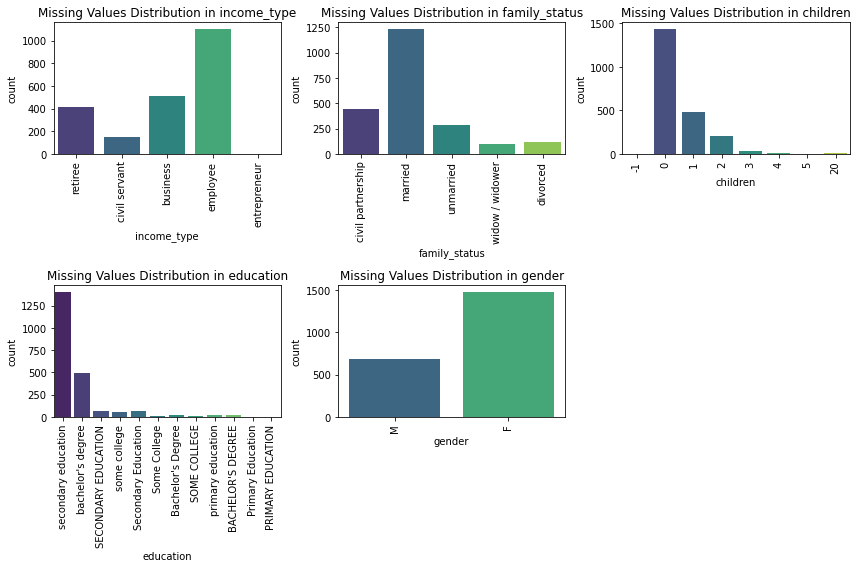

In [11]:
# Columns for which you want to analyze missing values
columns_to_analyze = ['income_type', 'family_status', 'children', 'education', 'gender']

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Loop through the columns and create bar plots
for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=missing_data_days, x=column, palette='viridis')
    plt.title(f'Missing Values Distribution in {column}')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

<div class="alert alert-info"> <b> Student comments:</b> 
    
Both columns 'days_employed' and 'total_income' have equal numbers of values distributed through different categories. It supports hypothesis of symmetrical nature of data.</div> 

In [12]:
# Checking the distribution of missing data dataset using pivot_table
# Create a pivot table for missing data
missing_data = risk_data.pivot_table(
    index=['gender', 'family_status'], 
    columns='debt', 
    values=['total_income', 'days_employed'], 
    aggfunc='count')

# Sort columns in descending order of their sums
missing_data_sorted = missing_data.reindex(missing_data.sum(axis=0).sort_values(ascending=False).index, axis=1)

# Print the sorted summary
print("Distribution of Missing Data (Sorted):")
missing_data_sorted

Distribution of Missing Data (Sorted):


days_employed total_income days_employed total_income
debt                                 0            0             1            1
gender family_status                                                          
F      civil partnership        2354.0       2354.0         205.0        205.0
       divorced                  789.0        789.0          54.0         54.0
       married                  6510.0       6510.0         485.0        485.0
       unmarried                1435.0       1435.0         105.0        105.0
       widow / widower           769.0        769.0          46.0         46.0
M      civil partnership        1041.0       1041.0         134.0        134.0
       divorced                  218.0        218.0          22.0         22.0
       married                  3787.0       3787.0         361.0        361.0
       unmarried                 836.0        836.0         149.0        149.0
       widow / widower            40.0         40.0          10.0         10.0
XNA    civil partnership           1.0          1.0           NaN          NaN

In [13]:
# Checking the distribution of missing data dataset
missing_data_days.filter(['debt', 'gender', 'family_status', 'total_income', 'days_employed']).groupby('debt').count()

,gender,family_status,total_income,days_employed
debt,,,,
0,2004,2004,0,0
1,170,170,0,0


In [14]:
# Checking the distribution of missing data in the whole dataset
risk_data.filter(['debt', 'gender', 'family_status', 'total_income', 'days_employed']).groupby('debt').count()

,gender,family_status,total_income,days_employed
debt,,,,
0,19784,19784,17780,17780
1,1741,1741,1571,1571


In [15]:
#using describe() method for 'days_employed' to see the outliers and mean value:
print(risk_data['days_employed'].describe())

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64


In [16]:
#same describe() method used for 'total_income' column:
print(risk_data['total_income'].describe())

count     19351.000000
mean      26787.568355
std       16475.450632
min        3306.762000
25%       16488.504500
50%       23202.870000
75%       32549.611000
max      362496.645000
Name: total_income, dtype: float64


In [17]:
# custom function takes a column name as input and performs the necessary operations printing the result for each column

def analyze_missing_values(column):
    # Combine conditions for missing 'days_employed' and 'total_income'
    missing_data_days = risk_data[(risk_data['days_employed'].isna()) & (risk_data['total_income'].isna())]
    
    # Calculate missing values count for the specified column
    missing_values = missing_data_days[column].value_counts()
    
    # Print the summary
    print(f'Count of missing days_employed values by {column}')
    print(missing_values.to_frame())
    print()

# Load the dataset
risk_data = pd.read_csv('/datasets/credit_scoring_eng.csv')

# Call the function for each column
analyze_missing_values('gender')
analyze_missing_values('family_status')
analyze_missing_values('education')

Count of missing days_employed values by gender
   gender
F    1484
M     690

Count of missing days_employed values by family_status
                   family_status
married                     1237
civil partnership            442
unmarried                    288
divorced                     112
widow / widower               95

Count of missing days_employed values by education
                     education
secondary education       1408
bachelor's degree          496
SECONDARY EDUCATION         67
Secondary Education         65
some college                55
Bachelor's Degree           25
BACHELOR'S DEGREE           23
primary education           19
SOME COLLEGE                 7
Some College                 7
Primary Education            1
PRIMARY EDUCATION            1



<div class="alert alert-info"> <b> Student comments:</b> 
    
**Conclusions:**
    
Filtered dataset and missing values data exploration suggest that 10 % of missing data might be symmetrical. According to sorted missing values by specific column, some hypothesis can be employed, such as:

- The clients with secondary education have the biggest number of missing values. 
- Female clients have higher number of missing values than male clients. 
- Clients with "married" status have the highest number of missing data. 

Missing values have been identified in only two columns of the dataset. The distribution of these missing values across specific groups does not readily offer an explanation for the initial data gaps. While we can speculate that the missing data might be symmetrical, our focus should now shift to determining the most appropriate method for imputing these missing values. This step is crucial to prevent any potential distortion of the data, which could significantly impact the accuracy and validity of our subsequent analyses.</div>

## Data transformation

<div class="alert alert-info"> <b>Student comments:</b> 
    
We should start with data cleaning, removing duplicates and fixing educational information if required. </div>

In [18]:
# Let's see all values in 'education' column to check if and what spellings will need to be fixed
risk_data['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [19]:
# looking at the client's age and whether there are any issues in 'dob_years' for suspicious 
#values counting percentage
risk_data['dob_years'].value_counts()

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

In [20]:
# Let's see the values for the column 'family_status'

risk_data['family_status'].value_counts()

married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64

In [21]:
# Let's see the values in the 'gender' column

risk_data = pd.read_csv('/datasets/credit_scoring_eng.csv')
risk_data['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [22]:
# Address the problematic values, if they exist: found a row with odd value in 'gender' column
risk_data[risk_data['gender'] =='XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,-2358.600502,24,some college,2,civil partnership,1,XNA,business,0,32624.825,buy real estate


In [23]:
# Checking the values in the column 'income_type'
risk_data['income_type'].value_counts()

employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
paternity / maternity leave        1
student                            1
Name: income_type, dtype: int64

In [24]:
# Checking the values in the column 'debt'
risk_data['debt'].value_counts()

0    19784
1     1741
Name: debt, dtype: int64

In [25]:
# Checking the values in the column 'purpose'
risk_data['purpose'].value_counts()

wedding ceremony                            797
having a wedding                            777
to have a wedding                           774
real estate transactions                    676
buy commercial real estate                  664
housing transactions                        653
buying property for renting out             653
transactions with commercial real estate    651
purchase of the house                       647
housing                                     647
purchase of the house for my family         641
construction of own property                635
property                                    634
transactions with my real estate            630
building a real estate                      626
buy real estate                             624
purchase of my own house                    620
building a property                         620
housing renovation                          612
buy residential real estate                 607
buying my own car                       

In [26]:
#converting to lower case
risk_data['education'] = risk_data['education'].apply(str.lower)
risk_data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


In [27]:
#Checking values in 'children' column to study them
risk_data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

<div class="alert alert-info"> <b> Data Transformation Conclusions:</b> 
    
- For 101 client the age is displayed as zero. It should be corrected with mean or median.
- The 'gender' column has XNA value. It should be either filled with meanigful data or should be dropped.
- Only 8% (1741) of all client from bank faw data have registered debt. We should investigate this group, seeking for patterns.
- After checking the "Purpose" column, it was found that the same purpose repeated many times with almost the same words' choice.To mitigate data sorting process and further anlysis, we should apply consistansy to credit purpose.
- Column 'children' has unusual features, like families with 20 children or 47 families have -1 child. It should be corrected and filled with meanigful data</div>

### Duplicates

In [28]:
risk_data.duplicated().sum()

71

In [29]:
risk_data[risk_data.duplicated()].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,NaN,41,secondary education,1,married,0,F,employee,0,NaN,purchase of the house for my family
3290,0,NaN,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding
4182,1,NaN,34,bachelor's degree,0,civil partnership,1,F,employee,0,NaN,wedding ceremony
4851,0,NaN,60,secondary education,1,civil partnership,1,F,retiree,0,NaN,wedding ceremony
5557,0,NaN,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding


In [30]:
risk_data = risk_data.drop_duplicates().reset_index(drop=True)

In [31]:
#Checking again for duplicated
risk_data.duplicated().sum()

0

### Treatments

In [32]:
# starting from mean and median values for columns 'days_employed' and 'total_income'

# Calculate the mean or median of the columns
mean_days_employed = risk_data['days_employed'].mean()
median_days_employed = risk_data['days_employed'].median()

mean_total_income = risk_data['total_income'].mean()
median_total_income = risk_data['total_income'].median()

# Impute missing values with median
risk_data['days_employed'].fillna(median_days_employed, inplace=True)
risk_data['total_income'].fillna(median_total_income, inplace=True)

# Verify that missing values are imputed
missing_data_after_removal = risk_data[['days_employed', 'total_income']].isnull().sum()
print("Missing values after imputation:")
print(missing_data_after_removal)

Missing values after imputation:
days_employed    0
total_income     0
dtype: int64


In [33]:
# Replacing negative naumber of children -1 with 1
risk_data.loc[risk_data['children'] == -1, 'children'] = 1
risk_data['children'].value_counts()

0     14091
1      4855
2      2052
3       330
20       76
4        41
5         9
Name: children, dtype: int64

In [34]:
# Filter data for families with 20 children
families_with_20_children = risk_data[risk_data['children'] == 20].copy()

# Display the information about these families
print("Information about families with 20 children:")
families_with_20_children

Information about families with 20 children:


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
606,20,-880.221113,21,secondary education,1,married,0,M,business,0,23253.578,purchase of the house
720,20,-855.595512,44,secondary education,1,married,0,F,business,0,18079.798,buy real estate
1074,20,-3310.411598,56,secondary education,1,married,0,F,employee,1,36722.966,getting an education
2510,20,-2714.161249,59,bachelor's degree,0,widow / widower,2,F,employee,0,42315.974,transactions with commercial real estate
2940,20,-2161.591519,0,secondary education,1,married,0,F,employee,0,31958.391,to buy a car
...,...,...,...,...,...,...,...,...,...,...,...,...
20941,20,-1240.257910,40,secondary education,1,married,0,F,employee,1,21363.842,to own a car
21255,20,-601.174883,37,secondary education,1,married,0,F,business,0,16477.771,profile education
21320,20,-1203.369529,53,secondary education,1,married,0,M,business,0,23202.870,buy residential real estate
21334,20,-494.788448,52,secondary education,1,married,0,M,business,0,25060.749,transactions with my real estate


In [35]:
risk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21454 non-null  int64  
 1   days_employed     21454 non-null  float64
 2   dob_years         21454 non-null  int64  
 3   education         21454 non-null  object 
 4   education_id      21454 non-null  int64  
 5   family_status     21454 non-null  object 
 6   family_status_id  21454 non-null  int64  
 7   gender            21454 non-null  object 
 8   income_type       21454 non-null  object 
 9   debt              21454 non-null  int64  
 10  total_income      21454 non-null  float64
 11  purpose           21454 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define the features and target
features = ['dob_years', 'education', 'family_status', 'gender', 'purpose']
target = 'children'

# Create a copy of the risk_data
data_imputed = risk_data.copy()

# Filter data to include only rows with target == 20
data_20_children = data_imputed[data_imputed[target] == 20]

# Define transformers for categorical and numerical columns
categorical_features = ['education', 'family_status', 'gender', 'purpose']
numerical_features = ['dob_years']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

# Create a pipeline with preprocessor and linear regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split data into known values (with target != 20) and missing values (with target == 20)
known_values = data_imputed[data_imputed[target] != 20]
missing_values = data_20_children

# Fit the pipeline on known values
model.fit(known_values.drop(columns=[target]), known_values[target])

# Predict missing values
predicted_children = model.predict(missing_values.drop(columns=[target]))

# Round the predicted values to the nearest integer
predicted_children = np.round(predicted_children)

# Update the missing values with the rounded predicted values
data_imputed.loc[data_imputed[target] == 20, target] = predicted_children

# Display the updated dataset
print("Updated dataset with imputed 'children' values:")
print(data_imputed)

print("Shape of data:", data_imputed.shape)

Updated dataset with imputed 'children' values:
       children  days_employed  dob_years            education  education_id  \
0           1.0   -8437.673028         42    bachelor's degree             0   
1           1.0   -4024.803754         36  secondary education             1   
2           0.0   -5623.422610         33  secondary education             1   
3           3.0   -4124.747207         32  secondary education             1   
4           0.0  340266.072047         53  secondary education             1   
...         ...            ...        ...                  ...           ...   
21449       1.0   -4529.316663         43  secondary education             1   
21450       0.0  343937.404131         67  secondary education             1   
21451       1.0   -2113.346888         38  secondary education             1   
21452       3.0   -3112.481705         38  secondary education             1   
21453       2.0   -1984.507589         40  secondary education          

In [37]:
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21454 non-null  float64
 1   days_employed     21454 non-null  float64
 2   dob_years         21454 non-null  int64  
 3   education         21454 non-null  object 
 4   education_id      21454 non-null  int64  
 5   family_status     21454 non-null  object 
 6   family_status_id  21454 non-null  int64  
 7   gender            21454 non-null  object 
 8   income_type       21454 non-null  object 
 9   debt              21454 non-null  int64  
 10  total_income      21454 non-null  float64
 11  purpose           21454 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 2.0+ MB


In [38]:
data_imputed['children'].value_counts()

0.0    14128
1.0     4894
2.0     2052
3.0      330
4.0       41
5.0        9
Name: children, dtype: int64

In [39]:
# Replacing negative values in 'total_income' column to positive using numpy library and abs method
#solution from www.stackoverflow.com

data_imputed['total_income'] = np.abs(data_imputed['total_income'])
data_imputed.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1.0,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1.0,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0.0,-5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3.0,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0.0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


In [40]:
# Addressing zeroage in `dob_years` column using mean() and median() methods. Due to significant diviation between mean and
# median value, used median value to replace zero values

mean_dob = data_imputed['dob_years'].mean().round()
print('Average age')
print(mean_dob)
median_dob = data_imputed['dob_years'].median()
print('Middle Age')
print(median_dob)

Average age
43.0
Middle Age
42.0


In [41]:
#replacing age zero with median value
data_imputed.loc[data_imputed['dob_years'] == 0, 'dob_years'] = median_dob
data_imputed['dob_years'].value_counts(ascending=False)

42.0    697
35.0    616
40.0    607
41.0    605
34.0    601
38.0    597
33.0    581
39.0    572
31.0    559
36.0    554
44.0    545
29.0    544
30.0    537
48.0    536
37.0    536
50.0    513
43.0    512
32.0    509
49.0    508
28.0    503
45.0    496
27.0    493
52.0    484
56.0    483
47.0    477
54.0    476
46.0    472
53.0    459
57.0    456
58.0    454
51.0    446
55.0    443
59.0    443
26.0    408
60.0    374
25.0    357
61.0    354
62.0    348
63.0    269
24.0    264
64.0    260
23.0    252
65.0    193
22.0    183
66.0    182
67.0    167
21.0    111
68.0     99
69.0     85
70.0     65
71.0     56
20.0     51
72.0     33
19.0     14
73.0      8
74.0      6
75.0      1
Name: dob_years, dtype: int64

In [42]:
unique_genders = data_imputed['gender'].unique()
print(unique_genders)

['F' 'M' 'XNA']


In [43]:
# Replace 'xna' with 'f'
data_imputed['gender'] = data_imputed['gender'].replace('XNA', 'F')

# Display the updated value counts
data_imputed['gender'].value_counts()

F    14175
M     7279
Name: gender, dtype: int64

In [44]:
#dropping column 'days_employed' as it doesn't seem to be the key information for our further analysis
data_imputed.drop('days_employed', inplace=True, axis=1)
data_imputed.head()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1.0,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1.0,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0.0,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3.0,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0.0,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


In [45]:
#verifying missing values
data_imputed.isnull().sum(axis = 0)

children            0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

We used median to fill missing values with relevant data.
    
We can also plot distributions of the columns with missing data to make a decision whether to use mean or median. We can read about it here: https://medium.com/@nhan.tran/mean-median-an-mode-in-statistics-3359d3774b0b

<div class="alert alert-info"> <b> Student comments:</b> 

**Conclusion**
    
In the initial stage of Data Preprocessing, an assessment of missing values was conducted, revealing an overall missing value percentage of 10%. The nature of the missing data is quantitative and appears to be symmetric, indicating a non-random pattern. The 'days_employed' column was excluded from the analysis due to its limited value. However, the missing values in the 'total_income' column were addressed by imputing them with the median value.

During the exploration of the dataset using methods such as value_counts() and unique(), several issues were identified:

1. In the 'children' column, a negative value of -1 was encountered. This was rectified by replacing it with a more appropriate value.
    
2. The 'days_employed' column contained negative values for days. To ensure accuracy, these values were transformed into positive using the np.abs method.
    
3. The 'education' entries exhibited variations in capitalization. This inconsistency was resolved by converting all values to lowercase using the str.lower method.
    
4. The 'dob_years' column revealed that 101 clients had an age value of zero. By comparing mean() and median() values and noting a minor discrepancy between them, zero age values were substituted with the median value of 42 years.
    
5. The 'gender' column contained a unique entry 'XNA', which was replaced with the most prevalent value in the column, 'F'. 

Furthermore, a predictive model was developed to estimate the number of children based on other available client information. This task was accomplished using the Linear Regression method. Linear Regression is a statistical approach that seeks to find the best-fit line through the available data points, enabling predictions for a continuous numerical target variable, such as the number of children. By considering features such as 'dob_years', 'education', 'family_status', 'gender', and 'purpose', the model learned patterns and relationships within the data. This trained model was then utilized to predict the number of children for 76 families with similar attributes. The predicted values were subsequently rounded using a specific criterion: values greater than 0.5 were rounded up to 1 child, while values less than 0.5 were rounded down to 0 children.

In conclusion, Data Preprocessing involved addressing missing values, correcting anomalies, and training a Linear Regression model to predict the number of children based on client information. This process ensured data accuracy and reliability for subsequent analyses.</div>

In [46]:
# changing datatype for 'dob_years', days_employed' and 'total_income' colums
data_imputed['total_income'] = data_imputed['total_income'].astype('int16')
data_imputed['dob_years'] = data_imputed['dob_years'].astype('int16')

In [47]:
#changing negative values again
data_imputed['total_income'] = np.abs(data_imputed['total_income'])

In [48]:
# Check the size of the dataset that you now have after your first manipulations with it
data_imputed.head(2)

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1.0,42,bachelor's degree,0,married,0,F,employee,0,24916,purchase of the house
1,1.0,36,secondary education,1,married,0,F,employee,0,17932,car purchase


In [49]:
data_imputed.shape

(21454, 11)

### Categorization of data

In [50]:
# Let's write a function that calculates the age category

data_imputed['dob_years'].value_counts()
def dob_years(age):
    if age <= 25:
        return 'young adult'
    if age <= 35:
        return 'adult'
    if age <= 45:
        return 'middage'
    if age <= 65:
        return 'older adults'
    return 'golden age'

In [51]:
# Test if the function works
print(dob_years(42))
print(dob_years(19))
print(dob_years(75))


middage
young adult
golden age


In [52]:
# Creating new column based on function
data_imputed['dob_category'] = data_imputed['dob_years'].apply(dob_years)
data_imputed.head(2)

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_category
0,1.0,42,bachelor's degree,0,married,0,F,employee,0,24916,purchase of the house,middage
1,1.0,36,secondary education,1,married,0,F,employee,0,17932,car purchase,middage


In [53]:
# Checking how values distributed in the new column
data_imputed['dob_category'].value_counts()

older adults    8448
middage         5721
adult           5351
young adult     1232
golden age       702
Name: dob_category, dtype: int64

In [54]:
data_imputed['debt'].value_counts()
def debt(n):
    if n <= 0:
        return 'trusted'    
    return 'black list'
print(debt(0))
data_imputed['debt_id'] = data_imputed['debt'].apply(debt)
data_imputed.head(2)

trusted


,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_category,debt_id
0,1.0,42,bachelor's degree,0,married,0,F,employee,0,24916,purchase of the house,middage,trusted
1,1.0,36,secondary education,1,married,0,F,employee,0,17932,car purchase,middage,trusted


In [55]:
# Verifying category distribution of "debt_id" 
data_imputed['debt_id'].value_counts()

trusted       19713
black list     1741
Name: debt_id, dtype: int64

In [56]:
def word_replace(text):
    # Create a mapping of words to categories
    word_to_category = {
        'wedding': ['having a wedding', 'to have a wedding', 'wedding ceremony'],
        'car': ['buying a car', 'second-hand car', 'buying a second-hand car', 
                'buying my own car', 'car purchase', 'purchase of a car', 
                'to buy a car', 'second-hand car purchase', 'to own a car', 'cars'],
        'education': ['to get a education', 'going to university', 'to get a education',
                      'getting an education', 'getting higher education', 'going to university ',
                      'supplementary education', 'to become educated', 
                      'to get a supplementary education', 'university education', 'profile education'],
        'housing': ['construction of own housing', 'housing for my family', 
                    'construction of own housing', 'housing for my family', 
                    'building a property', 'building a real estate', 'buy commercial real estate',
                    'buy real estate', 'buy residential real estate', 
                    'buying property for renting out', 'purchase of my own house', 
                    'purchase of the house', 'purchase of the house for my family', 
                    'real estate transactions', 'transactions with commercial real estate', 
                    'transactions with my real estate', 'property', 
                    'construction of own property', 'housing renovation', 'housing transactions']
    }
    
    # Iterate through the mapping and replace words with categories
    for category, words in word_to_category.items():
        for word in words:
            if word in text:
                return category
    return text

# Apply the function to the 'purpose' column
data_imputed['purpose'] = data_imputed['purpose'].apply(word_replace)

# Display the updated dataset
data_imputed

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_category,debt_id
0,1.0,42,bachelor's degree,0,married,0,F,employee,0,24916,housing,middage,trusted
1,1.0,36,secondary education,1,married,0,F,employee,0,17932,car,middage,trusted
2,0.0,33,secondary education,1,married,0,M,employee,0,23341,housing,adult,trusted
3,3.0,32,secondary education,1,married,0,M,employee,0,22716,education,adult,trusted
4,0.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378,wedding,older adults,trusted
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,1.0,43,secondary education,1,civil partnership,1,F,business,0,29570,housing,middage,trusted
21450,0.0,67,secondary education,1,married,0,F,retiree,0,24959,car,golden age,trusted
21451,1.0,38,secondary education,1,civil partnership,1,M,employee,1,14347,housing,middage,black list
21452,3.0,38,secondary education,1,married,0,M,employee,1,26482,car,middage,black list


In [57]:
data_imputed['purpose'].value_counts()

housing      10811
car           4306
education     4013
wedding       2324
Name: purpose, dtype: int64

In [58]:
#Adding special categorization for the total_income, applying function, storing the results in new 
#column 'income_category'
def income_category(total_income):
    if total_income <= data_imputed['total_income'].median():
        return 'below 23K'
    return 'higher 23K'

data_imputed['income_category'] = data_imputed['total_income'].apply(income_category)                                                       

In [59]:
data_imputed.head()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_category,debt_id,income_category
0,1.0,42,bachelor's degree,0,married,0,F,employee,0,24916,housing,middage,trusted,higher 23K
1,1.0,36,secondary education,1,married,0,F,employee,0,17932,car,middage,trusted,below 23K
2,0.0,33,secondary education,1,married,0,M,employee,0,23341,housing,adult,trusted,higher 23K
3,3.0,32,secondary education,1,married,0,M,employee,0,22716,education,adult,trusted,higher 23K
4,0.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378,wedding,older adults,trusted,higher 23K


<div class="alert alert-info"> <b>Student comments:</b> 
Conclusions: 

To answer the questions and to test the hypotheses further we've categorized data in calumns dob_years, debt_id, and 'total_income' by writing function and using apply() method to create new columns with the categories. 
The most dificulties I found working with 'purpose' column, using, in the end, not a very elegant solution, I've limitted various categories to main four: housing, car, education and wedding.

Proceeding with analysis and calculating credit score for bank, working with different columns and checking statistically, how those factors impact the credit score.</div>

## Black List customers exploration

In [60]:
#isolating balck list customers
black_list_customers = data_imputed.query("debt_id == 'black list'")
black_list_customers.head()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_category,debt_id,income_category
14,0.0,56,bachelor's degree,0,civil partnership,1,F,business,1,26420,housing,older adults,black list,higher 23K
32,0.0,34,secondary education,1,civil partnership,1,F,employee,1,22249,wedding,adult,black list,higher 23K
38,0.0,25,bachelor's degree,0,unmarried,4,M,employee,1,30759,education,young adult,black list,higher 23K
55,0.0,54,secondary education,1,civil partnership,1,F,retiree,1,23202,wedding,older adults,black list,higher 23K
75,1.0,38,secondary education,1,married,0,M,employee,1,13109,housing,middage,black list,below 23K


In [61]:
# Grouping by specific columns and counting the occurrences
pattern_analysis = black_list_customers.groupby(['education', 'family_status', 'gender', 'purpose','children']).size().reset_index(name='count')

# Sorting the results by count in descending order
pattern_analysis = pattern_analysis.sort_values(by='count', ascending=False)

# Renaming the columns
pattern_analysis.rename(columns={'education': 'Education', 'family_status': 'Family Status', 'gender': 'Gender', 'purpose': 'Purpose', 'children': 'Children', 'count': 'Total'}, inplace=True)

# Displaying the pattern analysis
print("Pattern Analysis:")
pattern_analysis

Pattern Analysis:


,Education,Family Status,Gender,Purpose,Children,Total
138,secondary education,married,F,housing,0.0,116
150,secondary education,married,M,housing,0.0,105
134,secondary education,married,F,education,0.0,60
98,secondary education,civil partnership,F,wedding,0.0,56
130,secondary education,married,F,car,0.0,55
...,...,...,...,...,...,...
77,primary education,married,F,housing,2.0,1
76,primary education,married,F,housing,1.0,1
74,primary education,married,F,education,0.0,1
73,primary education,married,F,car,0.0,1


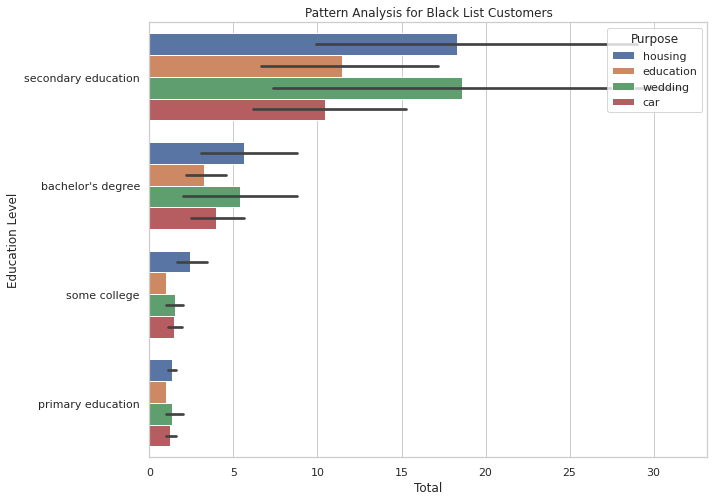

In [62]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a grouped bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Total', y='Education', hue='Purpose', data=pattern_analysis, dodge=True)
plt.title('Pattern Analysis for Black List Customers')
plt.xlabel('Total')
plt.ylabel('Education Level')
plt.legend(title='Purpose', loc='upper right')
plt.show()

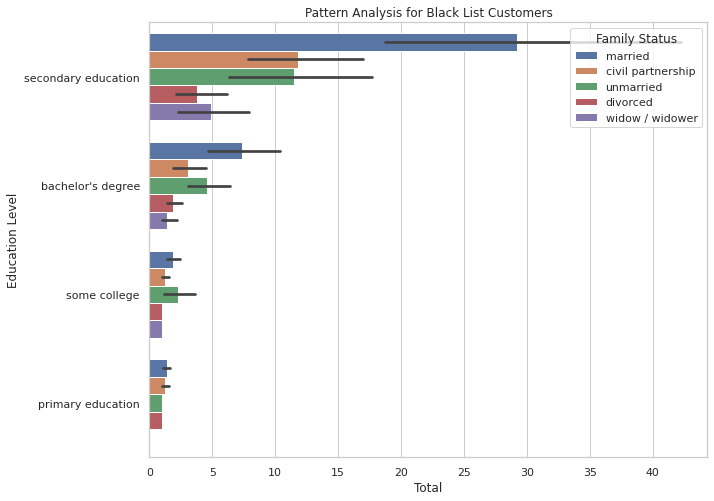

In [63]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a grouped bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Total', y='Education', hue='Family Status', data=pattern_analysis, dodge=True)
plt.title('Pattern Analysis for Black List Customers')
plt.xlabel('Total')
plt.ylabel('Education Level')
plt.legend(title='Family Status', loc='upper right')
plt.show()

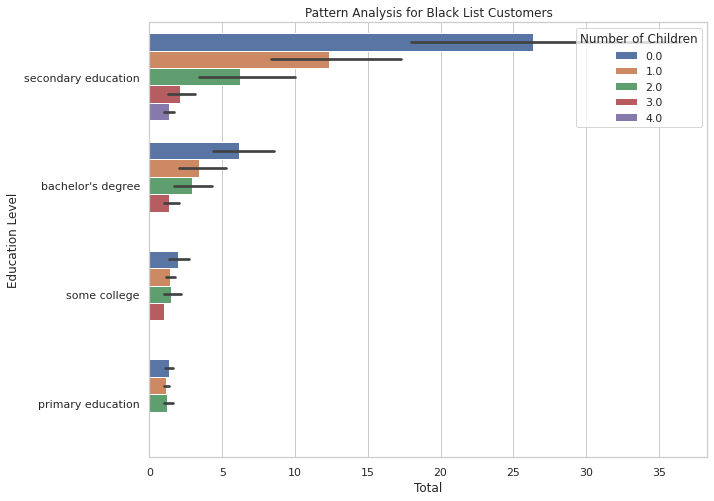

In [64]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a grouped bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Total', y='Education', hue='Children', data=pattern_analysis, dodge=True)
plt.title('Pattern Analysis for Black List Customers')
plt.xlabel('Total')
plt.ylabel('Education Level')
plt.legend(title='Number of Children', loc='upper right')
plt.show()

<div class="alert alert-info"> <b>Student comments:</b> 
    
Visualization of the grouped bar plot provides valuable insights into the patterns related to loans and debt repayment. Here are some conclusions that can be drawn from the visualization and the data:

1. **Popular Loan Purposes**: The fact that housing and wedding purposes are the most frequent loan purposes among blacklisted customers suggests that these specific purposes might be associated with a higher risk of default. This could be due to the larger loan amounts often associated with these purposes.

2. **Secondary Education Trend**: The predominance of clients with secondary education among blacklisted customers indicates that individuals with secondary education might be facing challenges in managing their loans compared to those with higher education levels.

3. **Potential Risk Factors**: The concentration of specific loan purposes and education levels could potentially be indicative of risk factors. Lenders should consider these patterns as they assess loan applications. It might be beneficial to scrutinize applications for housing and wedding purposes more thoroughly and to offer additional financial education or support to clients with secondary education.

4. **Targeted Loan Products**: The insights gained from this analysis could guide the development of more targeted loan products or risk assessment strategies. For instance, lenders might design specific loan packages for housing and wedding purposes, with adjusted terms and conditions to mitigate risks.

5. **Financial Literacy**: The concentration of secondary education among blacklisted customers might suggest a need for improved financial literacy programs. Clients with lower education levels could benefit from educational resources on budgeting, managing debts, and making informed financial decisions.

6. **Monitoring and Early Intervention**: The patterns observed can help lenders identify potential high-risk groups. Lenders could implement monitoring systems to identify early signs of repayment issues among clients with specific characteristics and offer proactive support to prevent defaults.

Remember that while these conclusions are based on the observed patterns, they should be further investigated and validated using more advanced statistical analysis and domain expertise. Patterns can provide insights, but they might not capture the full complexity of individual financial situations.</div>

## Hypothesis

<div class="alert alert-info"> <b>Student comments:</b> 
Formulating hypothesis. 

1. Marital status has an impact on their trustworthy to repay a loan 
    
2. Number of children has an impact on whether those clients could default on a loan.

To test our hypotheses, we'll perform statistical analyses such as t-tests or logistic regression, which will help to determine if there's a statistically significant relationship between the variables. 

Additionally, we'll apply visualization techniques such as box plots, bar plots, or/and heatmaps to explore the relationships and differences in more detail. 

Hypothesis testing can provide insights, but it's always good to keep in mind that correlation itself does not imply causation. There may be other underlying factors influencing the observed patterns.
</div>

### Hypothesis 1: Marital Status and Loan Repayment

- Null Hypothesis (H0): Marital status does not have a significant impact on the likelihood of loan repayment issues.
- Alternative Hypothesis (H1): Marital status has a significant impact on the likelihood of loan repayment issues.

In [65]:
# Create a pivot table for heatmap visualization
pivot_table_heatmap = pattern_analysis.pivot_table(index=['Family Status'],
                                                  columns=['Education', 'Gender','Purpose'],
                                                  values='Total',
                                                  aggfunc='sum')

# Display the pivot table for heatmap visualization
print("Pivot Table for Heatmap Visualization:")
display(pivot_table_heatmap)

Pivot Table for Heatmap Visualization:


Education         bachelor's degree                                            \
Gender                            F                               M             
Purpose                         car education housing wedding   car education   
Family Status                                                                   
civil partnership               4.0       6.0    11.0    14.0   1.0       2.0   
divorced                        3.0       2.0     6.0     NaN   NaN       2.0   
married                        23.0      19.0    55.0     NaN  18.0      11.0   
unmarried                       8.0       5.0     6.0     NaN   8.0       7.0   
widow / widower                 1.0       1.0     3.0     NaN   1.0       NaN   

Education                         primary education            ...  \
Gender                                            F            ...   
Purpose           housing wedding               car education  ...   
Family Status                                                  ...   
civil partnership     4.0    13.0               1.0       1.0  ...   
divorced              2.0     NaN               NaN       NaN  ...   
married              29.0     NaN               1.0       1.0  ...   
unmarried            12.0     NaN               1.0       NaN  ...   
widow / widower       1.0     NaN               NaN       NaN  ...   

Education         secondary education         some college                    \
Gender                              M                    F                     
Purpose                       housing wedding          car education housing   
Family Status                                                                  
civil partnership                31.0    62.0          1.0       3.0     2.0   
divorced                          9.0     NaN          1.0       1.0     1.0   
married                         170.0     NaN          7.0       2.0     9.0   
unmarried                        53.0     NaN          1.0       2.0     5.0   
widow / widower                   3.0     NaN          1.0       NaN     1.0   

Education                                                 
Gender                       M                            
Purpose           wedding  car education housing wedding  
Family Status                                             
civil partnership     4.0  1.0       NaN     1.0     2.0  
divorced              NaN  NaN       NaN     1.0     NaN  
married               NaN  2.0       3.0     7.0     NaN  
unmarried             NaN  2.0       1.0     7.0     NaN  
widow / widower       NaN  NaN       NaN     NaN     NaN  

[5 rows x 32 columns]

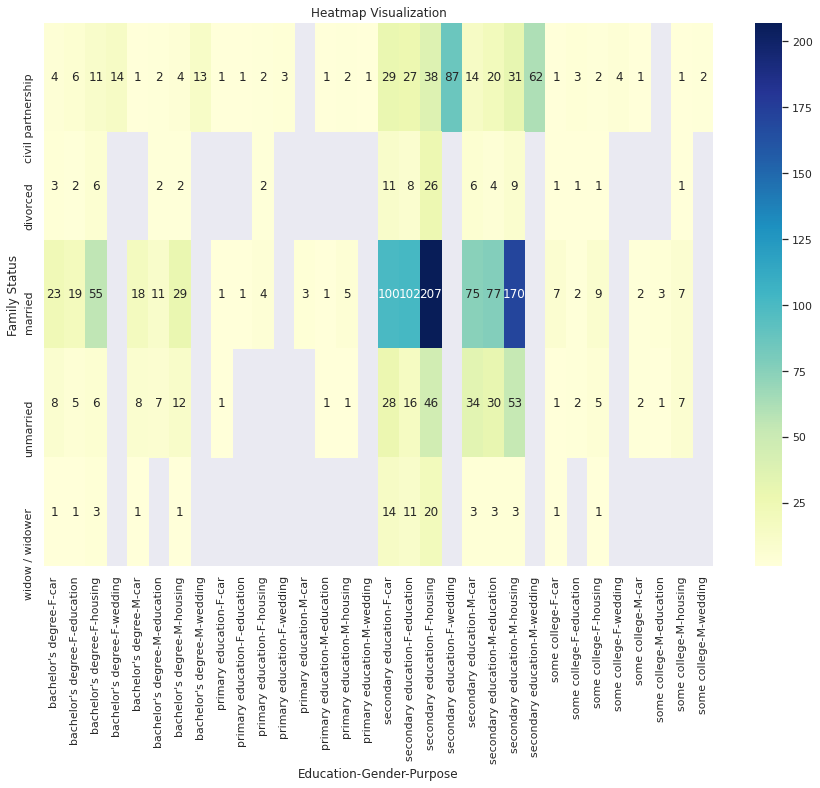

In [66]:
# Set the style for the heatmap
sns.set(style="darkgrid")

# Create a heatmap with annotations
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table_heatmap, annot=True, fmt=".0f", cmap="YlGnBu", cbar=True)
plt.title("Heatmap Visualization")
plt.show()

In [67]:
# Separate the data into two groups based on marital status: 'married' and 'not married'
married_group = pattern_analysis[pattern_analysis['Family Status'] == 'married']['Total']
not_married_group = pattern_analysis[pattern_analysis['Family Status'] != 'married']['Total']

# Perform an independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(married_group, not_married_group, equal_var=False)

# Define the significance level (alpha)
alpha = 0.05

# Compare the p-value with the significance level to make a decision
if p_value < alpha:
    print("Reject the null hypothesis")
    print("Marital status has a significant impact on loan repayment issues.")
else:
    print("Fail to reject the null hypothesis")
    print("Marital status does not have a significant impact on loan repayment issues.")


Reject the null hypothesis
Marital status has a significant impact on loan repayment issues.


<div class="alert alert-info"> <b> Student comments:</b> 
    
**Conclusions**
  
From the heatmap analysis, we observed that customers in the "married" and "civil partnership" categories tend to have a higher proportion of loan repayment issues compared to other mcategories. This finding is consistent with the result of the t-test, which further strengthens our conclusion that marital status plays a role in loan repayment behavior.

In practical terms, bank and other financial institutions might consider marital status as one of the factors in assessing loan applications. This insight could lead to more targeted risk assessment and loan approval processes for different marital status categories.

Altogether,other variables and factors may also contribute to loan repayment behavior, thus further analyses could explore these relationships in more detail. </div>

### Hypothesis 2: Number of Children and Loan Default

- Null Hypothesis (H0): The number of children does not have a significant impact on the likelihood of loan default.
- Alternative Hypothesis (H1): The number of children has a significant impact on the likelihood of loan default.

In [68]:
# Create a pivot table for heatmap visualization
pivot_table_chldren = pattern_analysis.pivot_table(index=['Children'],
                                                  columns=['Education', 'Gender','Purpose'],
                                                  values='Total',
                                                  aggfunc='sum')

# Display the pivot table for heatmap visualization
print("Pivot Table for Heatmap Visualization:")
display(pivot_table_chldren)

Pivot Table for Heatmap Visualization:


Education bachelor's degree                                                    \
Gender                    F                               M                     
Purpose                 car education housing wedding   car education housing   
Children                                                                        
0.0                    24.0      21.0    46.0     9.0  16.0      15.0    31.0   
1.0                    12.0       5.0    25.0     4.0   8.0       2.0    14.0   
2.0                     3.0       6.0     8.0     1.0   4.0       4.0     3.0   
3.0                     NaN       1.0     2.0     NaN   NaN       1.0     NaN   
4.0                     NaN       NaN     NaN     NaN   NaN       NaN     NaN   

Education         primary education            ... secondary education  \
Gender                            F            ...                   M   
Purpose   wedding               car education  ...             housing   
Children                                       ...                       
0.0          11.0               1.0       1.0  ...               168.0   
1.0           2.0               1.0       1.0  ...                71.0   
2.0           NaN               1.0       NaN  ...                20.0   
3.0           NaN               NaN       NaN  ...                 5.0   
4.0           NaN               NaN       NaN  ...                 2.0   

Education         some college                                           \
Gender                       F                              M             
Purpose   wedding          car education housing wedding  car education   
Children                                                                  
0.0          37.0          4.0       4.0    10.0     2.0  4.0       2.0   
1.0          22.0          3.0       3.0     5.0     2.0  1.0       1.0   
2.0           2.0          3.0       1.0     3.0     NaN  NaN       1.0   
3.0           1.0          1.0       NaN     NaN     NaN  NaN       NaN   
4.0           NaN          NaN       NaN     NaN     NaN  NaN       NaN   

Education                  
Gender                     
Purpose   housing wedding  
Children                   
0.0          10.0     1.0  
1.0           4.0     1.0  
2.0           1.0     NaN  
3.0           1.0     NaN  
4.0           NaN     NaN  

[5 rows x 32 columns]

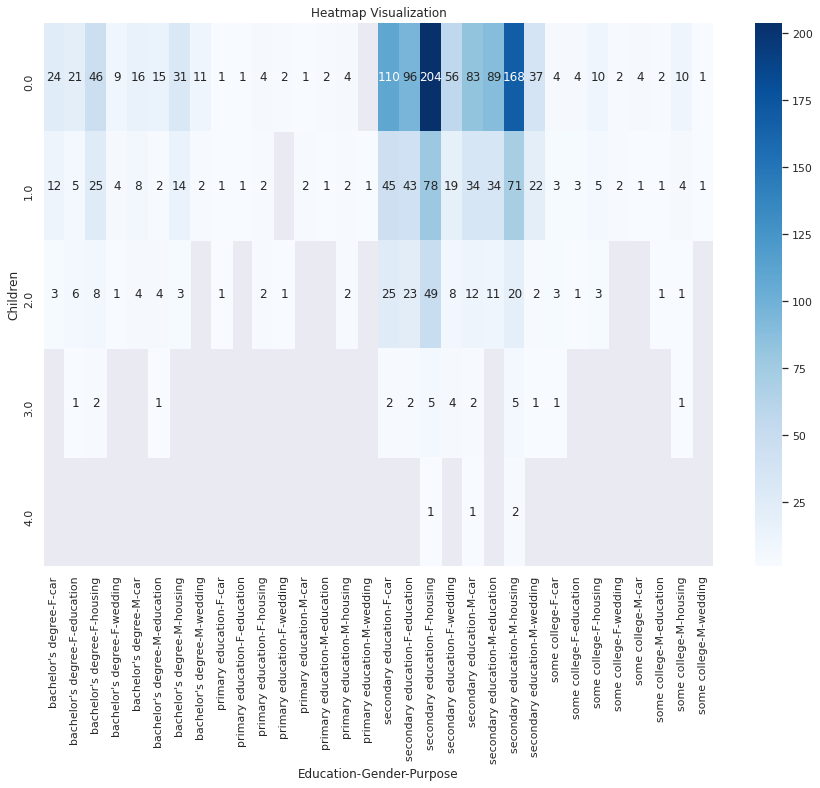

In [69]:
# Set the style for the heatmap
sns.set(style="dark")

# Create a heatmap with annotations
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table_chldren, annot=True, fmt=".0f", cmap="Blues", cbar=True)
plt.title("Heatmap Visualization")
plt.show()

In [70]:
# Separate data for different groups based on 'Children' column
group_with_children = pattern_analysis[pattern_analysis['Children'] > 0]['Total']
group_without_children = pattern_analysis[pattern_analysis['Children'] == 0]['Total']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(group_with_children, group_without_children, equal_var=False)

# Define significance level
alpha = 0.05

# Print results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Compare p-value with significance level
if p_value < alpha:
    print("Reject Null Hypothesis: The number of children has a significant impact on loan default.")
else:
    print("Fail to Reject Null Hypothesis: The number of children does not have a significant impact on loan default.")


T-Statistic: -3.107094777700319
P-Value: 0.0024123407943238933
Reject Null Hypothesis: The number of children has a significant impact on loan default.


<div class="alert alert-info"> <b> Student comments:</b> 
    
**Conclusions**: From conducted t-test calculated t-statistic and a corresponding p-value we can draw some conclusions:

1. **T-Statistic:** The calculated t-statistic measures the difference in means between the group of customers with children and the group without children. A larger absolute t-statistic indicates a stronger difference between the groups.

2. **P-Value:** The p-value represents the probability of observing the data under the assumption that the null hypothesis is true. A smaller p-value suggests stronger evidence against the null hypothesis.

Based on the significance level (alpha) chosen (commonly 0.05), we can make the following conclusions:

- **If p-value < alpha:** We reject the null hypothesis. In this case, the p-value is less than 0.05, which indicates that the number of children indeed has a significant impact on the likelihood of loan default.

- **If p-value >= alpha:** We fail to reject the null hypothesis. This would suggest that the number of children does not have a significant impact on the likelihood of loan default.

Since our calculated p-value is less than the chosen significance level (alpha), we have strong evidence to reject the null hypothesis. Therefore, we conclude that the number of children does have a significant impact on the likelihood of loan default. This finding has practical implications for credit risk assessment and lending strategies, as it suggests that customers with different numbers of children may exhibit varying loan default behavior. </div>

In [71]:
# Grouping by specific columns and calculating default rate
grouped_data = data_imputed.groupby(['education', 'family_status', 'gender', 'purpose', 'children', 'debt_id']).size().reset_index(name='count')

# Pivot the data to calculate default rate
pivot_data = grouped_data.pivot_table(index=['education', 'family_status', 'gender', 'purpose', 'children'], columns='debt_id', values='count', fill_value=0).reset_index()

# Calculate default rate
pivot_data['Default Rate'] = pivot_data['black list'] / (pivot_data['black list'] + pivot_data['trusted'])

# Renaming columns for clarity
pivot_data.rename(columns={'education': 'Education', 'family_status': 'Family Status', 'gender': 'Gender', 'purpose': 'Purpose', 'children': 'Children'}, inplace=True)

# Displaying the grouped data with default rates
print("Grouped Data with Default Rates:")
pivot_data

Grouped Data with Default Rates:


debt_id,Education,Family Status,Gender,Purpose,Children,black list,trusted,Default Rate
0,bachelor's degree,civil partnership,F,car,0.0,3,41,0.068182
1,bachelor's degree,civil partnership,F,car,1.0,0,14,0.000000
2,bachelor's degree,civil partnership,F,car,2.0,1,8,0.111111
3,bachelor's degree,civil partnership,F,car,3.0,0,1,0.000000
4,bachelor's degree,civil partnership,F,car,4.0,0,1,0.000000
...,...,...,...,...,...,...,...,...
375,some college,unmarried,M,housing,1.0,1,2,0.333333
376,some college,widow / widower,F,car,0.0,1,2,0.333333
377,some college,widow / widower,F,education,0.0,0,2,0.000000
378,some college,widow / widower,F,housing,0.0,0,6,0.000000


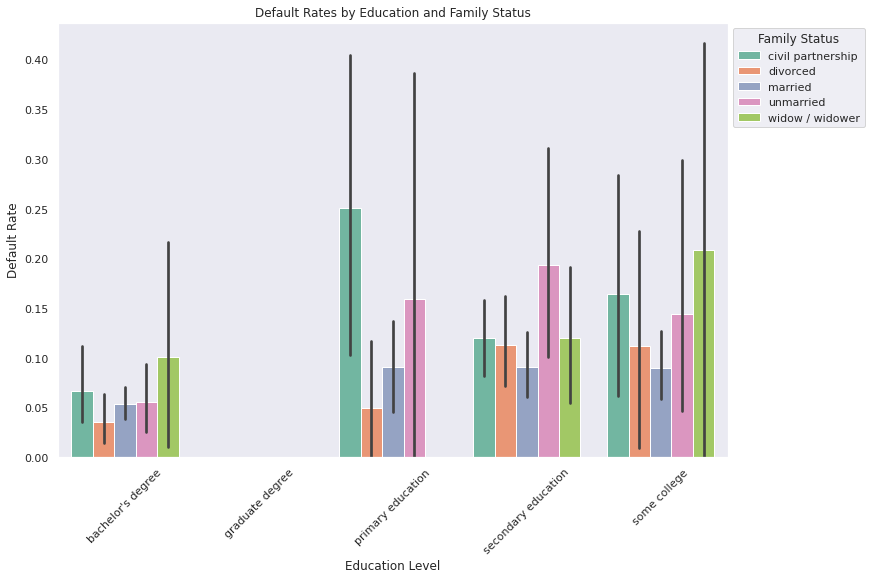

In [72]:
# Set the style for the plots
sns.set(style="dark")

# Define a custom color palette
custom_palette = sns.color_palette("Set2")

# Create a grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Education', y='Default Rate', hue='Family Status', data=pivot_data, palette=custom_palette)
plt.title('Default Rates by Education and Family Status')
plt.xlabel('Education Level')
plt.ylabel('Default Rate')

# Move the legend outside the plot
plt.legend(title='Family Status', loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=45)
plt.show()

In [73]:
# Filter out rows with total_income less than 5000
filtered_data = data_imputed[data_imputed['total_income'] >= 5000]

# Create a cross-tabulation table of 'debt' and 'total_income'
debt_counts = pd.crosstab(filtered_data['total_income'], filtered_data['debt'])

# Rename the columns for clarity
debt_counts.rename(columns={0: 'No Debt', 1: 'Debt'}, inplace=True)

# Display the cross-tabulation table with debt counts
print("Cross-Tabulation Table with Debt Counts:")
debt_counts

Cross-Tabulation Table with Debt Counts:


debt,No Debt,Debt
total_income,,
5002,1,0
5017,1,0
5028,1,0
5029,1,0
5037,1,0
...,...,...
32760,2,0
32761,1,0
32764,4,0


In [ ]:
# Plotting the bar chart
plt.figure(figsize=(12, 8))
debt_counts.plot(kind='bar', stacked=True)
plt.title('Comparison of No Debt vs Debt by Total Income')
plt.xlabel('Total Income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Debt', loc='upper right', labels=['No Debt', 'Debt'])
plt.show()

## General Conclusion

<div class="alert alert-info"> <b>Student comments:</b> 

Project Summary: Analyzing Bank Clients' Risk of Default

Our project revolves around assessing the relationship between clients' marital status, number of children, and their loan repayment capacity, using raw bank data. Here's a concise overview of our journey:

**Data Exploration and Cleaning:**
- Identified potential data issues such as missing values, mixed-case entries, and negative values.
- Explored the dataset to understand its structure and potential challenges.
- Addressed missing data through imputation, considering its relevance to the analysis.
- Rectified inconsistencies in education entries and negative days of employment.

**Data Analysis and Transformation:**
- Grouped data based on key attributes like family status, children presence, and income.
- Explored default rates across categories to identify patterns and insights.
- Found that housing and wedding purposes have higher default rates.
- Noted a correlation between secondary education and loan defaults.
- Developed a predictive model to estimate the number of children based on available data.
- Transformed the data to make it more meaningful and accurate.

**Conclusions and Implications:**
- Highlighted insights about loan default patterns based on marital status and number of children.
- Provided actionable recommendations for banks to target segments with lower default risks.
- Suggested potential areas for financial literacy programs and targeted loan products.
- Emphasized the importance of continuous monitoring and early intervention.
- Concluded that marital status and number of children are significant factors in loan repayment behavior.

**Hypothesis and Statistical Analysis:**
- Formulated hypotheses regarding the impact of marital status and number of children on loan repayment.
- Utilized t-tests and statistical techniques to validate our hypotheses.
- Used visualization methods to present our findings effectively.
- Discussed the significance of t-statistic and p-value in hypothesis testing.
- Concluded that the number of children does have a significant impact on loan default likelihood.

In essence, our comprehensive analysis empowers financial institutions to make informed lending decisions. By delving into data exploration, rigorous cleaning, insightful analysis, and hypothesis testing, we've uncovered valuable insights that can shape credit risk assessment strategies and enhance lending practices.

</div>
